## Performance weights

This notebook explores the performance weighting function $w_p$, as discussed in Skogestad §2.8.2. There is a [YouTube video](https://youtu.be/D-HrZdG_IdA) associated with this notebook.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import control

In [2]:
from ipywidgets import interact

In [3]:
s = control.TransferFunction.s

For this notebook, we'll choose third order system with a PI controller

In [4]:
def tfs(τP, Kc, τI):
    # System
    G = 1/(τP*s + 1)**3

    # PI controller:
    K = Kc*(1 + 1/(τI*s))

    L = G*K

    T = control.feedback(G*K)

    S = 1 - T
    
    return G, L, S, T

In [5]:
G, L, S, T = tfs(1, 2, 3)

In [6]:
def plotstep(G, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(*control.step_response(G))

This is what the uncontrolled dynamics of the system look like:

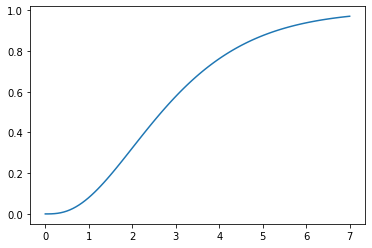

In [7]:
plotstep(G)

And here are the setpoint and disturbance responses:

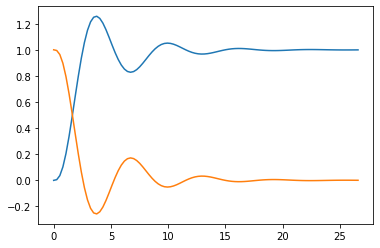

In [8]:
plotstep(T)
plotstep(S)

Let's think about the frequency response version of this. From the plot above, we can see that there is considerable dynamics in the order of 20 seconds or so, with "fast" dynamics being in the order of single seconds, not much happening faster than that. This motivates our frequency range of interest as about 0.01 rad/sec to 10 rad/sec

In [9]:
import numpy

ω = numpy.logspace(-2, 1, 1000)

def gain(G):
    return numpy.abs(G(1j*ω))

def gainplot(G, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.loglog(ω, gain(G))

It's instructive to look at the loop transfer function's frequency response. I'll also plot the gain crossover frequency:

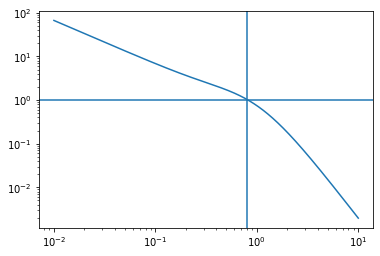

In [10]:
gainplot(L)
plt.axhline(1)
plt.axvline(0.8)

Now let's see what that looks like for the closed loop and add the bandwidth:

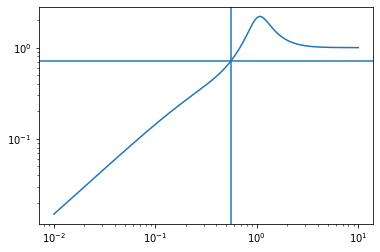

In [11]:
gainplot(S)
plt.axhline(1/numpy.sqrt(2))
plt.axvline(0.56)

Here's simple performance weighting as discussed by Skogestad:

In [12]:
def wP(M, ωB, A):
    return (s/M + ωB)/(s + ωB*A)

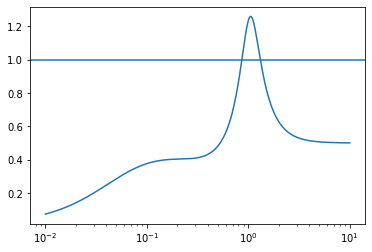

In [13]:
plt.semilogx(ω, gain(S*wP(2, 0.3, 0.2)))
plt.axhline(1)

We can that here we are not delivering the performance we would like 

In [14]:
def investigation(τP=1, Kc=2, τI=3, M=2, ωB=0.3, A=0.2):
        
    fig, [[axfreqloglog, axsetpoint], [axfreqlin, axdist]] = plt.subplots(2, 2, figsize=(15, 7), sharex='col')
    
    G, L, S, T = tfs(τP, Kc, τI)
    
    gainplot(S, ax=axfreqloglog)
    gainplot(1/wP(M, ωB, A), ax=axfreqloglog)
    
    gainplot(S*wP(M, ωB, A), ax=axfreqlin)
    axfreqlin.set_yscale('linear')
    
    plotstep(T, axsetpoint)
    axsetpoint.axvline(1/ωB)

    plotstep(S, axdist)
    

In [15]:
interact(investigation, 
         τP=(1., 10),
         Kc=(0.1, 5),
         τI=(1., 30),
         M=(1.5, 3),
         ωB=(0.01, 1, 0.01),
         A=(0.01, 0.5)
        )

interactive(children=(FloatSlider(value=1.0, description='τP', max=10.0, min=1.0), FloatSlider(value=2.0, desc…

<function __main__.investigation(τP=1, Kc=2, τI=3, M=2, ωB=0.3, A=0.2)>